In [1]:
import sys
from packaging import version
import sklearn


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Voting classifier

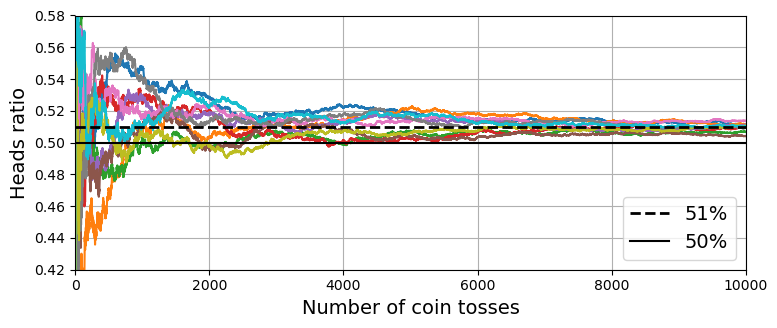

In [3]:
# extra code – this cell generates and saves Figure 7–3

import matplotlib.pyplot as plt
import numpy as np

heads_proba = 0.51
np.random.seed(42)
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8, 3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.grid()
save_fig("law_of_large_numbers_plot")
plt.show()

Building a voting classififer:

In [4]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples = 500,noise = 0.30, random_state= 42)
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42)),
        ('rf', RandomForestClassifier(random_state = 42)),
        ('svc', SVC(random_state = 42,))
    ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [5]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.85
rf = 0.88
svc = 0.87


In [6]:
voting_clf.score(X_test, y_test)

0.87

## Bagging and Pasting
**Bagging (Bootstrap Aggregating)** e **Pasting** são técnicas de *ensemble learning*, onde vários modelos independentes são treinados para melhorar a performance do modelo final. Elas têm a mesma ideia de combinar múltiplos modelos para aumentar a precisão e reduzir o overfitting, mas a principal diferença entre elas está na forma como os dados são amostrados para treinar os modelos.

### **Bagging**

* **Objetivo:** Reduzir a variância do modelo e ajudar a evitar o overfitting.
* **Como funciona:**

  1. **Amostragem de Dados:** Para cada modelo individual, é gerado um subconjunto de dados de treino de forma *bootstrap*, ou seja, os dados são amostrados com reposição. Isso significa que alguns exemplos de dados podem ser repetidos, e outros podem ser deixados de fora.
  2. **Treinamento dos Modelos:** Cada modelo treinado recebe um subconjunto diferente de dados (com reposição), criando assim modelos diferentes.
  3. **Previsões Finais:** As previsões de todos os modelos são combinadas. Para problemas de classificação, utiliza-se uma votação majoritária entre os modelos. Para problemas de regressão, a média das previsões é calculada.

  **Exemplo:** Um modelo muito conhecido que utiliza o bagging é o **Random Forest**, que combina várias árvores de decisão, treinadas com diferentes subconjuntos dos dados.

### **Pasting**

* **Objetivo:** Também visa reduzir a variância, mas a principal diferença em relação ao Bagging é a forma de amostragem dos dados.
* **Como funciona:**

  1. **Amostragem de Dados:** Ao contrário do bagging, onde os dados são amostrados com reposição, no pasting os dados são amostrados **sem reposição**. Ou seja, cada modelo recebe um subconjunto único de dados, sem que um mesmo dado seja utilizado em mais de um modelo.
  2. **Treinamento dos Modelos:** Cada modelo é treinado com um subconjunto distinto de dados.
  3. **Previsões Finais:** Como no bagging, as previsões de todos os modelos são combinadas de acordo com o tipo de problema (votação majoritária ou média).

  **Exemplo:** O pasting é uma variação mais simples do bagging, onde os dados não têm sobreposição entre os modelos.

### **Principais Diferenças entre Bagging e Pasting:**

1. **Amostragem de Dados:**

   * **Bagging:** Amostragem com reposição (dados podem ser repetidos).
   * **Pasting:** Amostragem sem reposição (dados não se repetem).
2. **Robustez e Diversidade dos Modelos:**

   * **Bagging** tende a criar modelos mais diversos, porque a amostragem com reposição pode resultar em diferentes subconjuntos de dados, mesmo que alguns dados sejam repetidos.
   * **Pasting** cria modelos menos diversos, já que os dados não se repetem, mas são distribuídos entre os modelos sem sobreposição.

### **Resumindo:**

* **Bagging** é mais comum e cria modelos mais diversos, sendo particularmente eficaz para reduzir a variância e evitar o overfitting.
* **Pasting** é uma versão mais simples e direta, sem sobreposição de dados entre os modelos.

Ambas as técnicas são muito eficazes, mas o bagging geralmente é mais popular devido à sua robustez na redução de variância.


In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

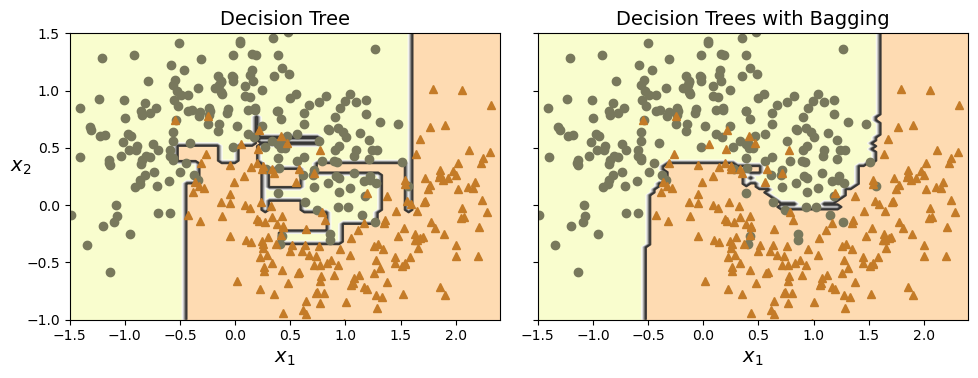

In [8]:
# extra code – this cell generates and saves Figure 7–5

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

## Avaliação out-of-bag

A avaliação out-of-bag (OOB) é uma técnica utilizada em métodos de ensemble como o Bagging para estimar a performance do modelo sem a necessidade de um conjunto de validação separado. Em cada árvore do ensemble,\ parte dos dados de treino não é utilizada devido à amostragem com reposição (bootstrap). Esses exemplos "deixados de fora" (out-of-bag) podem ser usados para testar a árvore correspondente. A média das previsões OOB de todas as árvores fornece uma estimativa precisa da acurácia do modelo, similar à validação cruzada, mas sem custo computacional extra. Para ativar essa avaliação, basta definir `oob_score=True` ao criar o `BaggingClassifier` e acessar o atributo `oob_score_` após o treinamento.

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap = True, n_jobs = -1, random_state = 42,
    oob_score= True,
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.91

In [11]:
#Checando para ver se o valor do oob_score é o mesmo que o score do modelo
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

## Random Forests
Random forests sao grupoamentos de arvores de decisao, geralmente treinadas por meio deo metodo bagging(as vezes pasting), e normalmente com o max_samples definido para o tamanho do conjunto de treinamento


In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)